<a href="https://colab.research.google.com/github/jcval94/Actuarial-Functions/blob/master/Flask_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# ============================
# 1. INSTALAR CLOUDFLARED
# ============================
!wget https://github.com/cloudflare/cloudflared/releases/latest/download/cloudflared-linux-amd64.deb -q
!dpkg -i cloudflared-linux-amd64.deb

# ============================
# 2. CLONAR TU REPOSITORIO
# ============================
!git clone https://github.com/jcval94/Proyecto_CC.git
%cd Proyecto_CC

# Si tienes un requirements.txt, descomenta la siguiente línea e instala todo:
# !pip install -r requirements.txt

# ============================
# 3. INICIAR LA APP FLASK
# ============================
import threading
import subprocess
import time
import re

def run_app():
    # IMPORTA TU APLICACIÓN FLASK
    # Ajusta si el archivo se llama diferente.
    # Asegúrate de que en 'app.py' esté:  app = Flask(__name__)
    from app import app
    # Asegúrate de usar host='0.0.0.0' para que sea accesible en la interfaz de Cloudflared
    app.run(host="0.0.0.0", port=5000, use_reloader=False)

# Iniciamos Flask en un hilo para no bloquear la ejecución
flask_thread = threading.Thread(target=run_app)
flask_thread.start()

# ============================
# 4. LEVANTAR EL TÚNEL CLOUDFLARED
# ============================
# Comando para exponer el puerto 5000 a través de cloudflared
tunnel_process = subprocess.Popen(
    ["cloudflared", "tunnel", "--url", "http://localhost:5000", "--logfile", "cloudflared.log"],
    stdout=subprocess.PIPE,
    stderr=subprocess.PIPE
)

# Esperamos unos segundos a que se inicie el túnel
time.sleep(10)



Selecting previously unselected package cloudflared.
(Reading database ... 124926 files and directories currently installed.)
Preparing to unpack cloudflared-linux-amd64.deb ...
Unpacking cloudflared (2025.2.0) ...
Setting up cloudflared (2025.2.0) ...
Processing triggers for man-db (2.10.2-1) ...
Cloning into 'Proyecto_CC'...
remote: Enumerating objects: 64, done.
remote: Counting objects: 100% (64/64), done.
remote: Compressing objects: 100% (29/29), done.
remote: Total 64 (delta 18), reused 39 (delta 15), pack-reused 0 (from 0)
Receiving objects: 100% (64/64), 16.44 KiB | 623.00 KiB/s, done.
Resolving deltas: 100% (18/18), done.
/content/Proyecto_CC


Exception in thread Thread-10 (run_app):
Traceback (most recent call last):
  File "/usr/lib/python3.11/threading.py", line 1045, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.11/threading.py", line 982, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-1-35803f2701d3>", line 28, in run_app
  File "/content/Proyecto_CC/app.py", line 6, in <module>
    from authlib.integrations.flask_client import OAuth
ModuleNotFoundError: No module named 'authlib'


In [ ]:
# ============================
# 5. OBTENER Y MOSTRAR LA URL
# ============================
# Buscamos en el log la línea que contiene "trycloudflare.com"
with open("cloudflared.log", "r") as f:
    log_lines = f.read().splitlines()

public_url = None
for line in log_lines:
    if "trycloudflare.com" in line:
        # Buscar algo como "https://xxxx.trycloudflare.com"
        url_match = re.search("https://[a-zA-Z0-9-]+\.trycloudflare\.com", line)
        if url_match:
            public_url = url_match.group(0)
            break

if public_url:
    print("Tu aplicación Flask está disponible en:", public_url)
else:
    print("No se pudo encontrar la URL en los logs. Revisa 'cloudflared.log' para más detalles.")


Tu aplicación Flask está disponible en: https://councils-resist-involvement-astronomy.trycloudflare.com


# OP 2

In [ ]:
# 1. Instalar Cloudflared
!wget https://github.com/cloudflare/cloudflared/releases/latest/download/cloudflared-linux-amd64.deb -q
!dpkg -i cloudflared-linux-amd64.deb

# 2. Clonar el repositorio
!git clone https://github.com/jcval94/Proyecto_CC.git
%cd Proyecto_CC

# 3. Instalar dependencias de Flask (y las que requiera tu proyecto)
!pip install flask

# 4. Iniciar la aplicación Flask en un hilo separado
import threading
import time

def run_app():
    from app import app  # Asegúrate que en 'app.py' se defina: app = Flask(__name__)
    # Ejecuta Flask en host 0.0.0.0 para que sea accesible externamente
    app.run(host="0.0.0.0", port=5000, use_reloader=False)

flask_thread = threading.Thread(target=run_app)
flask_thread.start()

# Agrega un retraso para asegurarte de que Flask esté corriendo
print("Esperando a que Flask se inicie...")
time.sleep(10)  # Ajusta el tiempo si es necesario

# 5. Iniciar el túnel con Cloudflared
import subprocess
import re

# Inicia cloudflared en un proceso separado y guarda los logs en cloudflared.log
tunnel_process = subprocess.Popen(
    ["cloudflared", "tunnel", "--url", "http://localhost:5000", "--logfile", "cloudflared.log"],
    stdout=subprocess.PIPE,
    stderr=subprocess.PIPE
)

# Espera unos segundos para que el túnel se configure
time.sleep(5)

# Extraer la URL del log
with open("cloudflared.log", "r") as f:
    log_lines = f.read().splitlines()

public_url = None
for line in log_lines:
    # Busca la línea que contiene la URL
    url_match = re.search(r"https://[a-zA-Z0-9-]+\.trycloudflare\.com", line)
    if url_match:
        public_url = url_match.group(0)
        break

if public_url:
    print("Tu aplicación Flask está disponible en:", public_url)
else:
    print("No se pudo encontrar la URL en los logs. Revisa 'cloudflared.log' para más detalles.")


(Reading database ... 124930 files and directories currently installed.)
Preparing to unpack cloudflared-linux-amd64.deb ...
Unpacking cloudflared (2025.2.0) over (2025.2.0) ...
Setting up cloudflared (2025.2.0) ...
Processing triggers for man-db (2.10.2-1) ...
Cloning into 'Proyecto_CC'...
remote: Enumerating objects: 64, done.
remote: Counting objects: 100% (64/64), done.
remote: Compressing objects: 100% (29/29), done.
remote: Total 64 (delta 18), reused 39 (delta 15), pack-reused 0 (from 0)
Receiving objects: 100% (64/64), 16.44 KiB | 16.44 MiB/s, done.
Resolving deltas: 100% (18/18), done.
/content/Proyecto_CC/Proyecto_CC


Exception in thread Thread-11 (run_app):
Traceback (most recent call last):
  File "/usr/lib/python3.11/threading.py", line 1045, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.11/threading.py", line 982, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-3-db1112b7a9e5>", line 17, in run_app
  File "/content/Proyecto_CC/Proyecto_CC/app.py", line 6, in <module>
    from authlib.integrations.flask_client import OAuth
ModuleNotFoundError: No module named 'authlib'


Esperando a que Flask se inicie...
Tu aplicación Flask está disponible en: https://time-provision-speakers-suppose.trycloudflare.com


# OP3

In [ ]:
# --- Paso 1: Instalar el cliente SSH (si no está instalado) ---
!apt-get install -y openssh-client

# --- Paso 2: Clonar el repositorio ---
!git clone https://github.com/jcval94/Proyecto_CC.git
%cd Proyecto_CC

# --- Paso 3: Instalar Flask (y cualquier dependencia adicional) ---
!pip install flask

# --- Paso 4: Iniciar la aplicación Flask en un hilo ---
import threading, time, subprocess, re

def run_flask():
    from app import app  # Asegúrate de que en app.py esté definido: app = Flask(__name__)
    # Es fundamental que la app se inicie en host '0.0.0.0'
    app.run(host='0.0.0.0', port=5000, use_reloader=False)

flask_thread = threading.Thread(target=run_flask)
flask_thread.start()

# Dar unos segundos para que Flask inicie correctamente
print("Esperando a que Flask se inicie...")
time.sleep(5)

# --- Paso 5: Iniciar el túnel con localhost.run ---
# Esto abrirá un túnel que redirige el puerto 80 público a localhost:5000
cmd = ["ssh", "-o", "StrictHostKeyChecking=no", "-R", "80:localhost:5000", "ssh.localhost.run"]
tunnel_proc = subprocess.Popen(cmd, stdout=subprocess.PIPE, stderr=subprocess.PIPE, text=True)

# --- Paso 6: Leer la salida del túnel para extraer la URL pública ---
def read_tunnel_output(proc):
    public_url = None
    while True:
        line = proc.stdout.readline()
        if not line:
            break
        print(line, end='')  # Mostrar la salida en la celda
        # Buscar en la línea la URL con formato https://xxxx.localhost.run
        match = re.search(r'(https://[a-zA-Z0-9\-]+\.localhost\.run)', line)
        if match:
            public_url = match.group(1)
            break
    return public_url

print("Estableciendo túnel y obteniendo URL pública...")
tunnel_url = read_tunnel_output(tunnel_proc)
if tunnel_url:
    print("\nTu aplicación Flask está disponible en:", tunnel_url)
else:
    print("\nNo se pudo obtener la URL del túnel. Revisa la salida para más detalles.")


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
openssh-client is already the newest version (1:8.9p1-3ubuntu0.10).
0 upgraded, 0 newly installed, 0 to remove and 18 not upgraded.
Cloning into 'Proyecto_CC'...
remote: Enumerating objects: 64, done.
remote: Counting objects: 100% (64/64), done.
remote: Compressing objects: 100% (29/29), done.
remote: Total 64 (delta 18), reused 39 (delta 15), pack-reused 0 (from 0)
Receiving objects: 100% (64/64), 16.44 KiB | 2.35 MiB/s, done.
Resolving deltas: 100% (18/18), done.
/content/Proyecto_CC/Proyecto_CC/Proyecto_CC


Exception in thread Thread-12 (run_flask):
Traceback (most recent call last):
  File "/usr/lib/python3.11/threading.py", line 1045, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.11/threading.py", line 982, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-4-0a653bc7f57d>", line 15, in run_flask
  File "/content/Proyecto_CC/Proyecto_CC/Proyecto_CC/app.py", line 6, in <module>
    from authlib.integrations.flask_client import OAuth
ModuleNotFoundError: No module named 'authlib'


Esperando a que Flask se inicie...
Estableciendo túnel y obteniendo URL pública...

No se pudo obtener la URL del túnel. Revisa la salida para más detalles.


# OP4

In [ ]:
# Instalar Gradio (si aún no lo tienes instalado)
!pip install gradio

import gradio as gr
from IPython.display import Javascript, display

# Función que genera un saludo
def greet(name):
    return f"¡Hola, {name}!"

# Crear la interfaz con Gradio
iface = gr.Interface(
    fn=greet,
    inputs=gr.inputs.Textbox(label="Escribe tu nombre"),
    outputs=gr.outputs.Textbox(label="Saludo"),
    title="Demo de Gradio en Colab"
)

# Lanzar la aplicación. Con share=True, Gradio genera una URL pública.
# La función launch() devuelve (app, local_url, share_url).
app, local_url, share_url = iface.launch(share=True)

print("Tu aplicación está disponible en:", share_url)

# Abrir la URL pública en una nueva pestaña mediante Javascript.
display(Javascript('window.open("{}", "_blank")'.format(share_url)))


AttributeError: module 'gradio' has no attribute 'inputs'

# OP5

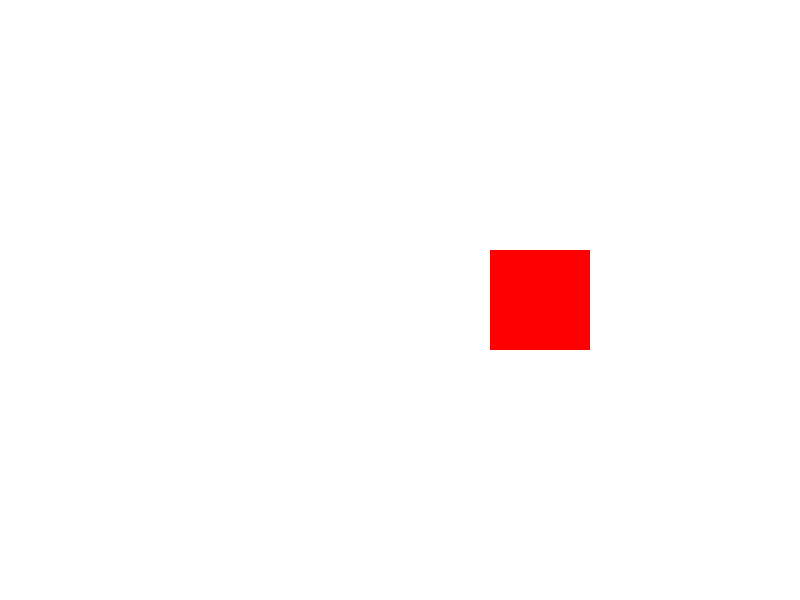

In [ ]:
# Instalar dependencias: Xvfb, pygame y pyvirtualdisplay
!apt-get install -qq xvfb
!pip install pygame pyvirtualdisplay pillow

# Iniciar una pantalla virtual
from pyvirtualdisplay import Display
display = Display(visible=0, size=(800,600))
display.start()

# Importar librerías necesarias
import pygame
import time
from IPython.display import display as ipy_display, clear_output
from PIL import Image

# Inicializar pygame y configurar la ventana (la cual se renderiza en la pantalla virtual)
pygame.init()
ancho, alto = 800, 600
screen = pygame.display.set_mode((ancho, alto))
pygame.display.set_caption("Pygame en Colab")
clock = pygame.time.Clock()

# Bucle principal de pygame: se ejecutará 50 frames y se mostrará cada uno en el notebook
running = True
frame = 0

while running and frame < 50:
    # Procesar eventos (aunque en este entorno no habrá interacción real)
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            running = False

    # Actualizar la pantalla: fondo blanco y un rectángulo rojo en movimiento
    screen.fill((255, 255, 255))
    x = (frame * 10) % ancho  # Movimiento horizontal del rectángulo
    pygame.draw.rect(screen, (255, 0, 0), (x, 250, 100, 100))
    pygame.display.flip()

    # Capturar la imagen actual de la pantalla
    raw_str = pygame.image.tostring(screen, 'RGB')
    img = Image.frombytes('RGB', (ancho, alto), raw_str)

    # Mostrar la imagen en el notebook (borrando la anterior para simular una animación)
    clear_output(wait=True)
    ipy_display(img)

    # Esperar un poco para controlar la velocidad (5 fps)
    clock.tick(5)
    frame += 1

pygame.quit()


In [ ]:
import ipywidgets as widgets
from IPython.display import display, clear_output

# Creamos un área de salida para el registro del chat con scroll y un borde.
chat_log = widgets.Output(layout={
    'border': '1px solid gray',
    'width': '100%',
    'height': '300px',
    'overflow_y': 'scroll',
    'padding': '10px'
})

# Creamos un widget de texto para que el usuario ingrese su mensaje.
user_input = widgets.Text(
    placeholder='Escribe tu mensaje aquí...',
    description='Tú:',
    layout=widgets.Layout(width='80%')
)

# Botón para enviar el mensaje.
send_button = widgets.Button(
    description='Enviar',
    layout=widgets.Layout(width='18%')
)

# Función que se ejecuta al pulsar el botón.
def enviar_mensaje(b):
    mensaje = user_input.value.strip()
    if mensaje == "":
        return  # No se envía si el mensaje está vacío
    with chat_log:
        # Mostrar el mensaje del usuario
        print("Usuario:", mensaje)
        # Procesar el mensaje y generar respuesta del chatbot
        # Aquí puedes implementar la lógica que desees; en este ejemplo, el bot simplemente repite el mensaje.
        respuesta = f"Bot: {mensaje}"
        print(respuesta)
        print()  # Línea en blanco para separar mensajes
    user_input.value = ""  # Limpiar el campo de texto

# Asociamos la función al botón.
send_button.on_click(enviar_mensaje)

# Organizamos los widgets en una interfaz de chat.
chat_interface = widgets.VBox([
    chat_log,
    widgets.HBox([user_input, send_button])
])

# Mostramos la interfaz.
display(chat_interface)


# Opción:

In [ ]:
# Instalar (o actualizar) Gradio
!pip install --upgrade gradio

import gradio as gr

# Función que procesa el mensaje y actualiza el historial del chat
def chatbot_response(message, history):
    if history is None:
        history = []
    # Ejemplo simple: el bot repite el mensaje con un prefijo "Echo:"
    history.append((message, f"Echo: {message}"))
    return "", history

# Definir el CSS personalizado para darle un estilo elegante con degradado azul
custom_css = """
/* Fondo general con degradado azul */
body {
  background: linear-gradient(135deg, #1e3c72, #2a5298);
  font-family: 'Arial', sans-serif;
  color: #ffffff;
  margin: 0;
  padding: 20px;
}

/* Estilo para el contenedor principal de Gradio */
.gradio-container {
  background: transparent;
}

/* Estilo para el área del chatbot */
#chatbot {
  height: 500px;
  background-color: rgba(255, 255, 255, 0.1);
  border: 1px solid rgba(255,255,255,0.3);
  border-radius: 8px;
  padding: 10px;
  overflow: auto;
}

/* Estilos para los mensajes del chatbot */
.gradio-chatbot-message {
  background-color: rgba(255,255,255,0.2) !important;
  border-radius: 8px;
  padding: 5px 10px;
  margin: 5px 0;
}

/* Estilo para el Textbox */
.gradio-textbox {
  background-color: rgba(255,255,255,0.2);
  border: none;
  border-radius: 4px;
  color: #ffffff;
  padding: 8px;
}

/* Estilo para el botón */
.gradio-button {
  background-color: #2a5298;
  color: #ffffff;
  border: none;
  border-radius: 4px;
  padding: 8px 16px;
}
"""

# Definir la interfaz usando Gradio Blocks con el CSS personalizado
with gr.Blocks(css=custom_css) as demo:
    gr.Markdown("<h2 style='text-align: center;'>Chatbot de Ejemplo</h2>")
    chatbot = gr.Chatbot(elem_id="chatbot")
    with gr.Row():
        with gr.Column(scale=0.9):
            # El contenedor del Textbox se ha deshabilitado para que respete nuestro CSS
            msg = gr.Textbox(show_label=False, placeholder="Escribe tu mensaje y presiona Enter", container=False)
        with gr.Column(scale=0.1):
            clear = gr.Button("Clear")

    # Al enviar el mensaje (al presionar Enter) se llama a chatbot_response
    msg.submit(chatbot_response, [msg, chatbot], [msg, chatbot])
    # El botón "Clear" limpia la conversación
    clear.click(lambda: (None, []), None, [msg, chatbot], queue=False)

    # Lanzar la interfaz en una nueva pestaña del navegador y generar una URL compartible
    demo.launch(inbrowser=True, share=True)


/usr/local/lib/python3.11/dist-packages/gradio/components/chatbot.py:282: UserWarning: You have not specified a value for the `type` parameter. Defaulting to the 'tuples' format for chatbot messages, but this is deprecated and will be removed in a future version of Gradio. Please set type='messages' instead, which uses openai-style dictionaries with 'role' and 'content' keys.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/gradio/layouts/column.py:55: UserWarning: 'scale' value should be an integer. Using 0.9 will cause issues.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/gradio/layouts/column.py:55: UserWarning: 'scale' value should be an integer. Using 0.1 will cause issues.
  warnings.warn(


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://1a32d89e509871f0d4.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


# Opcion Q

In [ ]:
# --- Instalar cliente SSH (en caso de que no esté) ---
!apt-get install -qq openssh-client

In [ ]:
%%bash
cat > index.html << 'EOF'
<!DOCTYPE html>
<html>
<head>
  <meta charset="UTF-8">
  <title>Chat Bot Personalizado</title>
  <style>
    body { font-family: Arial, sans-serif; margin: 20px; }
    #chatLog { border: 1px solid #ccc; height: 400px; overflow-y: scroll; padding: 10px; }
    #message { width: 80%; padding: 10px; }
    #sendButton { padding: 10px; }
  </style>
</head>
<body>
  <h2>Chat Bot Personalizado</h2>
  <div id="chatLog"></div>
  <br>
  <input type="text" id="message" placeholder="Escribe tu mensaje aquí..." />
  <button id="sendButton">Enviar</button>

  <script>
    const chatLog = document.getElementById("chatLog");
    const messageInput = document.getElementById("message");
    const sendButton = document.getElementById("sendButton");

    function addMessage(sender, text) {
      const p = document.createElement("p");
      p.innerHTML = "<strong>" + sender + ":</strong> " + text;
      chatLog.appendChild(p);
      chatLog.scrollTop = chatLog.scrollHeight;
    }

    sendButton.addEventListener("click", function() {
      const msg = messageInput.value;
      if (msg.trim() === "") return;
      addMessage("Usuario", msg);
      messageInput.value = "";

      // Enviar el mensaje al servidor vía fetch (petición POST a /chat)
      fetch("/chat", {
        method: "POST",
        headers: { "Content-Type": "application/json" },
        body: JSON.stringify({ message: msg })
      })
      .then(response => response.json())
      .then(data => {
        addMessage("Bot", data.reply);
      })
      .catch(error => {
        addMessage("Error", "No se pudo obtener respuesta del servidor.");
        console.error("Error:", error);
      });
    });

    // Permitir enviar con la tecla Enter
    messageInput.addEventListener("keyup", function(event) {
      if (event.key === "Enter") {
        sendButton.click();
      }
    });
  </script>
</body>
</html>
EOF


In [ ]:

# --- Código Python para levantar un servidor HTTP simple ---
import http.server
import socketserver
import json
import threading

PORT = 8000

class ChatHandler(http.server.SimpleHTTPRequestHandler):
    def do_POST(self):
        if self.path == "/chat":
            content_length = int(self.headers.get('Content-Length', 0))
            post_data = self.rfile.read(content_length)
            data = json.loads(post_data.decode('utf-8'))
            message = data.get("message", "")
            # Aquí puedes personalizar la respuesta del chatbot.
            reply = "Echo: " + message
            response = { "reply": reply }
            response_bytes = json.dumps(response).encode('utf-8')
            self.send_response(200)
            self.send_header("Content-Type", "application/json")
            self.send_header("Content-Length", str(len(response_bytes)))
            self.end_headers()
            self.wfile.write(response_bytes)
        else:
            self.send_error(404)

def run_server():
    with socketserver.TCPServer(("", PORT), ChatHandler) as httpd:
        print("Servidor corriendo en el puerto", PORT)
        httpd.serve_forever()

# Iniciar el servidor en un hilo (para que no bloquee el notebook)
server_thread = threading.Thread(target=run_server, daemon=True)
server_thread.start()

# --- Iniciar túnel usando localhost.run para exponer el servidor ---
import subprocess, time, re
tunnel_cmd = [
    "ssh", "-o", "StrictHostKeyChecking=no",
    "-R", "80:localhost:8000", "ssh.localhost.run"
]
tunnel_proc = subprocess.Popen(tunnel_cmd, stdout=subprocess.PIPE, stderr=subprocess.PIPE, text=True)
print("Esperando a que se establezca el túnel...")
time.sleep(5)  # Dar tiempo a que se inicie el túnel

public_url = None
while True:
    line = tunnel_proc.stdout.readline()
    if not line:
        break
    print(line, end="")  # Mostrar salida del túnel
    match = re.search(r"(https://[a-zA-Z0-9\-]+\.localhost\.run)", line)
    if match:
        public_url = match.group(1)
        break

if public_url:
    print("\nTu interfaz de chat está disponible en:", public_url)
    from IPython.display import Javascript, display
    display(Javascript('window.open("{}", "_blank")'.format(public_url)))
else:
    print("No se pudo obtener la URL pública.")


Esperando a que se establezca el túnel...
Servidor corriendo en el puerto 8000
No se pudo obtener la URL pública.


# OP L

In [ ]:
import ipywidgets as widgets
from IPython.display import display, clear_output

output_area = widgets.Output(layout={
    'border': '1px solid gray', 'height': '200px', 'overflow_y': 'scroll'
})
text_input = widgets.Text(placeholder="Escribe algo...")
send_button = widgets.Button(description="Enviar")

def on_send_click(b):
    with output_area:
        print("Usuario:", text_input.value)
        print("Bot: Echo:", text_input.value)
        print()
    text_input.value = ""

send_button.on_click(on_send_click)
display(widgets.VBox([output_area, text_input, send_button]))


In [ ]:
import urllib.parse
from IPython.display import Javascript, display

html_content = """
<!DOCTYPE html>
<html>
<head>
    <meta charset="UTF-8">
    <title>Ventana HTML sin servidor</title>
</head>
<body>
    <h1>Hola desde una ventana independiente</h1>
    <p>Este contenido no está conectado a Python, es puramente estático.</p>
</body>
</html>
"""

encoded = urllib.parse.quote(html_content)
js = f'window.open("data:text/html,{encoded}", "_blank");'
display(Javascript(js))


<IPython.core.display.Javascript object>

# OP N

In [ ]:
import tkinter as tk

# Función que se ejecuta al presionar el botón "Enviar"
def enviar():
    mensaje = entry.get()
    text.insert(tk.END, f"Usuario: {mensaje}\n")
    # Aquí puedes poner la lógica de respuesta de tu chatbot
    respuesta = f"Bot: Echo {mensaje}\n"
    text.insert(tk.END, respuesta)
    entry.delete(0, tk.END)

# Configuración de la ventana principal
ventana = tk.Tk()
ventana.title("Chat Bot Interactivo")

# Área de texto para el chat
text = tk.Text(ventana, height=20, width=50)
text.pack(pady=10)

# Campo de entrada para escribir el mensaje
entry = tk.Entry(ventana, width=40)
entry.pack(side=tk.LEFT, padx=(10, 0))

# Botón para enviar el mensaje
boton = tk.Button(ventana, text="Enviar", command=enviar)
boton.pack(side=tk.LEFT, padx=10)

# Iniciar el loop de la ventana
ventana.mainloop()


In [ ]:
import urllib.parse
from IPython.display import Javascript, display

html_content = """
<!DOCTYPE html>
<html>
<head>
  <meta charset="UTF-8">
  <title>Ventana de Chat (estática)</title>
</head>
<body>
  <h1>Interfaz de Chat Personalizada</h1>
  <p>Aquí podrías tener una interfaz editable con HTML/JavaScript.</p>
  <!-- Aquí incluirías tu HTML y lógica de JavaScript -->
</body>
</html>
"""

encoded = urllib.parse.quote(html_content)
js = f'window.open("data:text/html,{encoded}", "_blank");'
display(Javascript(js))


<IPython.core.display.Javascript object>

OP N+1

In [ ]:
%%html
<style>
  /* Estilos para la ventana flotante */
  #myModal {
      position: fixed;
      top: 20%;
      left: 20%;
      width: 400px;
      height: 300px;
      background-color: #fff;
      border: 1px solid #ccc;
      z-index: 9999;
      padding: 10px;
      box-shadow: 2px 2px 10px rgba(0,0,0,0.5);
      resize: both;
      overflow: auto;
  }
  #myModalHeader {
      padding: 5px;
      background: #f1f1f1;
      cursor: move;
      font-weight: bold;
  }
  #chatArea {
      width: 100%;
      height: 150px;
      resize: none;
  }
  #userInput {
      width: 80%;
  }
</style>

<div id="myModal">
  <div id="myModalHeader">Ventana de Chat Editable</div>
  <div style="padding: 10px;">
    <textarea id="chatArea" readonly placeholder="Aquí se mostrará el chat..."></textarea><br><br>
    <input type="text" id="userInput" placeholder="Escribe tu mensaje...">
    <button onclick="sendMessage()">Enviar</button>
  </div>
</div>

<script>
  // Hacer la ventana flotante "draggable"
  dragElement(document.getElementById("myModal"));
  function dragElement(elmnt) {
    var pos1 = 0, pos2 = 0, pos3 = 0, pos4 = 0;
    // Si existe un header, se usa para arrastrar
    if (document.getElementById(elmnt.id + "Header")) {
      document.getElementById(elmnt.id + "Header").onmousedown = dragMouseDown;
    } else {
      elmnt.onmousedown = dragMouseDown;
    }
    function dragMouseDown(e) {
      e = e || window.event;
      e.preventDefault();
      pos3 = e.clientX;
      pos4 = e.clientY;
      document.onmouseup = closeDragElement;
      document.onmousemove = elementDrag;
    }
    function elementDrag(e) {
      e = e || window.event;
      e.preventDefault();
      pos1 = pos3 - e.clientX;
      pos2 = pos4 - e.clientY;
      pos3 = e.clientX;
      pos4 = e.clientY;
      elmnt.style.top = (elmnt.offsetTop - pos2) + "px";
      elmnt.style.left = (elmnt.offsetLeft - pos1) + "px";
    }
    function closeDragElement() {
      document.onmouseup = null;
      document.onmousemove = null;
    }
  }

  // Función para procesar el envío del mensaje y actualizar el chat
  function sendMessage() {
    var input = document.getElementById('userInput');
    var chat = document.getElementById('chatArea');
    var message = input.value.trim();
    if (message === "") return;
    // Agregar el mensaje del usuario
    chat.value += "Usuario: " + message + "\n";
    // Aquí puedes implementar la lógica de tu chatbot; en este ejemplo, simplemente responde "Echo: ..."
    chat.value += "Bot: Echo: " + message + "\n\n";
    input.value = "";
    // Mantener el scroll al final
    chat.scrollTop = chat.scrollHeight;
  }
</script>


# OP 5

In [ ]:
from google.colab import output

def send_to_python(message):
    # Aquí procesas el mensaje recibido desde la ventana flotante.
    print("Mensaje recibido en Python:", message)
    # En este ejemplo, simplemente devolvemos un eco del mensaje.
    return "Echo from Python: " + message

# Registrar el callback con el nombre 'notebook.sendToPython'
output.register_callback('notebook.sendToPython', send_to_python)


In [ ]:
%%html
<style>
  /* Estilos para la ventana flotante */
  #myModal {
      position: fixed;
      top: 20%;
      left: 20%;
      width: 600px;
      height: 400px;
      background-color: #fff;
      border: 1px solid #ccc;
      z-index: 9999;
      padding: 10px;
      box-shadow: 2px 2px 10px rgba(0,0,0,0.5);
      resize: both;
      overflow: auto;
  }
  #myModalHeader {
      padding: 5px;
      background: #f1f1f1;
      cursor: move;
      font-weight: bold;
  }
  #chatArea {
      width: 100%;
      height: 250px;
      resize: none;
  }
  #userInput {
      width: 80%;
  }
</style>

<div id="myModal">
  <div id="myModalHeader">Ventana de Chat Editable</div>
  <div style="padding: 10px;">
    <textarea id="chatArea" readonly placeholder="Aquí se mostrará el chat..."></textarea><br><br>
    <input type="text" id="userInput" placeholder="Escribe tu mensaje...">
    <button onclick="sendMessage()">Enviar</button>
  </div>
</div>

<script>
  // Hacer que la ventana sea "draggable"
  dragElement(document.getElementById("myModal"));
  function dragElement(elmnt) {
    var pos1 = 0, pos2 = 0, pos3 = 0, pos4 = 0;
    if (document.getElementById(elmnt.id + "Header")) {
      document.getElementById(elmnt.id + "Header").onmousedown = dragMouseDown;
    } else {
      elmnt.onmousedown = dragMouseDown;
    }
    function dragMouseDown(e) {
      e = e || window.event;
      e.preventDefault();
      pos3 = e.clientX;
      pos4 = e.clientY;
      document.onmouseup = closeDragElement;
      document.onmousemove = elementDrag;
    }
    function elementDrag(e) {
      e = e || window.event;
      e.preventDefault();
      pos1 = pos3 - e.clientX;
      pos2 = pos4 - e.clientY;
      pos3 = e.clientX;
      pos4 = e.clientY;
      elmnt.style.top = (elmnt.offsetTop - pos2) + "px";
      elmnt.style.left = (elmnt.offsetLeft - pos1) + "px";
    }
    function closeDragElement() {
      document.onmouseup = null;
      document.onmousemove = null;
    }
  }

  // Función para enviar el mensaje y actualizar el chat
  function sendMessage() {
    var input = document.getElementById('userInput');
    var chat = document.getElementById('chatArea');
    var message = input.value.trim();
    if (message === "") return;
    // Mostrar el mensaje del usuario en el área de chat
    chat.value += "Usuario: " + message + "\n";

    // Enviar el mensaje a Python usando la API de callbacks de Colab.
    // Se invoca la función registrada con el nombre 'notebook.sendToPython'
    google.colab.kernel.invokeFunction('notebook.sendToPython', [message], {})
      .then(response => {
        // Agregar la respuesta de Python al área de chat
        chat.value += "Python: " + response.data + "\n\n";
      })
      .catch(err => {
        chat.value += "Error: No se pudo contactar Python.\n\n";
        console.error(err);
      });

    input.value = "";
    chat.scrollTop = chat.scrollHeight;
  }
</script>


# FV

In [ ]:
from IPython.display import HTML, display

# Lee el contenido del archivo HTML
with open('chatbot.html', 'r', encoding='utf-8') as f:
    html_content = f.read()

# Muestra el contenido HTML en la celda
display(HTML(html_content))


In [ ]:
from IPython.display import HTML, display

html_code = """
<!DOCTYPE html>
<html lang="es">
  <head>
    <meta charset="utf-8">
    <title>Chatbot Conectado a Python</title>
    <style>
      /* Reset de estilos */
      * {
          box-sizing: border-box;
          margin: 0;
          padding: 0;
      }
      body {
          font-family: 'Roboto', sans-serif;
          background: linear-gradient(to right, #4facfe, #00f2fe);
          margin: 0;
      }
      /* Contenedor principal */
      .chat-container {
          max-width: 800px;
          width: 100%;
          height: 90vh;
          margin: 20px auto;
          background-color: #fff;
          border-radius: 10px;
          box-shadow: 0 4px 20px rgba(0, 0, 0, 0.1);
          display: flex;
          flex-direction: column;
      }
      /* Área de conversación con scroll */
      .chat-box {
          flex-grow: 1;
          min-height: 0;
          overflow-y: auto;
          padding: 15px;
          border-bottom: 1px solid #eee;
          background-color: #f9f9f9;
      }
      /* Estilos para los mensajes */
      .user-message, .bot-message {
          margin-bottom: 15px;
          display: flex;
          align-items: flex-end;
      }
      .user-message p, .bot-message p {
          padding: 12px 20px;
          font-size: 15px;
          max-width: 90%;
          text-align: left;
          box-shadow: 0 2px 10px rgba(0, 0, 0, 0.1);
          white-space: pre-wrap;
      }
      .user-message p {
          background-color: #007bff;
          color: white;
          border-radius: 20px 20px 0 20px;
      }
      .bot-message p {
          background-color: #eaeaea;
          color: #333;
          border-radius: 20px 20px 20px 0;
      }
      .user-message {
          justify-content: flex-end;
      }
      .bot-message {
          justify-content: flex-start;
      }
      /* Formulario de entrada */
      .input-container {
          display: flex;
          padding: 15px;
          background-color: #fff;
      }
      .input-container input[type="text"] {
          width: 100%;
          padding: 15px;
          border-radius: 30px;
          border: 1px solid #ddd;
          font-size: 16px;
          outline: none;
          transition: all 0.3s;
          box-shadow: 0 2px 5px rgba(0, 0, 0, 0.1);
      }
      .input-container input[type="text"]:focus {
          border-color: #007bff;
      }
      .input-container input[type="submit"] {
          background-color: #007bff;
          color: white;
          padding: 15px 20px;
          border: none;
          border-radius: 30px;
          margin-left: 10px;
          cursor: pointer;
          font-size: 16px;
          transition: background-color 0.3s;
          box-shadow: 0 2px 5px rgba(0, 0, 0, 0.1);
      }
      .input-container input[type="submit"]:hover {
          background-color: #0056b3;
      }
      /* Estilos para la barra de scroll */
      .chat-box::-webkit-scrollbar {
          width: 8px;
      }
      .chat-box::-webkit-scrollbar-thumb {
          background-color: #ccc;
          border-radius: 10px;
      }
      .chat-box::-webkit-scrollbar-track {
          background-color: transparent;
      }
    </style>
  </head>
  <body>
    <div class="chat-container">
      <div class="chat-box" id="chat-box">
        <div class="bot-message">
          <p>¡Hola! Soy un asistente. Escribe tu consulta.</p>
        </div>
      </div>
      <form class="input-container" id="chat-form">
        <input type="text" id="text_input" placeholder="Escribe tu mensaje..." required>
        <input type="submit" value="Enviar">
      </form>
    </div>

    <script>
      // Función para agregar un mensaje al chat
      function addMessage(message, isUser = true) {
        const chatBox = document.getElementById('chat-box');
        const messageDiv = document.createElement('div');
        messageDiv.classList.add(isUser ? 'user-message' : 'bot-message');
        const messageParagraph = document.createElement('p');
        messageParagraph.textContent = message;
        messageDiv.appendChild(messageParagraph);
        chatBox.appendChild(messageDiv);
        chatBox.scrollTop = chatBox.scrollHeight;
      }

      // Manejar el envío del formulario
      document.getElementById('chat-form').addEventListener('submit', function(e) {
        e.preventDefault(); // Prevenir la recarga de la página
        const inputField = document.getElementById('text_input');
        const userMessage = inputField.value.trim();
        if (userMessage) {
          addMessage(userMessage, true); // Agregar mensaje del usuario
          inputField.value = ''; // Limpiar el campo de entrada

          // Mostrar mensaje de procesamiento
          const processingMessage = "Procesando respuesta...";
          addMessage(processingMessage, false);

          // Invocar la función Python 'process_text'
          google.colab.kernel.invokeFunction('process_text', [userMessage], {})
            .then(result => {
              let outputText = result.data;
              // Extraer únicamente el valor de "text/plain" si existe
              if (outputText && outputText["text/plain"]) {
                outputText = outputText["text/plain"];
                if (outputText.startsWith("'") && outputText.endsWith("'")) {
                  outputText = outputText.substring(1, outputText.length - 1);
                }
              }
              // Eliminar el mensaje de procesamiento
              const chatBox = document.getElementById('chat-box');
              const lastBotMessage = chatBox.querySelector('.bot-message:last-child');
              if (lastBotMessage) {
                chatBox.removeChild(lastBotMessage);
              }
              // Agregar la respuesta del bot
              addMessage(outputText, false);
            })
            .catch(error => {
              console.error('Error al llamar a process_text:', error);
            });
        }
      });

      // Asegurarse de que el chat se desplace al último mensaje al cargar la página
      window.onload = function() {
        const chatBox = document.getElementById('chat-box');
        chatBox.scrollTop = chatBox.scrollHeight;
      };
    </script>
  </body>
</html>
"""



In [ ]:
#@title ChatBot
display(HTML(html_code))